In [ ]:
pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.3/417.3 kB 11.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prince  # For MCA
plt.style.use('ggplot')

In [ ]:
# Define color mapping
party_colors = {
    1: '#507AA6',  # Democrat - Blue
    2: '#FF0000',  # Republican - Red
}
party_labels = {1: "Dem", 2: "Rep"}

In [ ]:
# Function to fill missing values based on data type
def fillna_based_on_dtype(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('na')
        else:
            df[col] = df[col].fillna(99)

In [ ]:
# Function to preprocess data and split by party
def preprocess_data(csv_file):
    df = pd.read_csv(csv_file)

    # Split data by party groups
    X_d = df[df["partyid"] <= 3]
    X_r = df[df["partyid"] >= 5]
    # X_d = df[df["partyid"] == 1]
    # X_r = df[df["partyid"] == 2]

    # Print missing value ratios
    print("Missing value ratio (DEM):", X_d.isna().sum().sum() / (X_d.size))
    print("Missing value ratio (REP):", X_r.isna().sum().sum() / (X_r.size))

    # Fill missing values
    fillna_based_on_dtype(X_d)
    fillna_based_on_dtype(X_r)

    # Relabel party IDs
    X_d["partyid"] = X_d["partyid"].replace([3, 2], 1)
    X_r["partyid"] = X_r["partyid"].replace([5, 6, 7], 2)

    # Combine the two groups
    return pd.concat([X_d, X_r], ignore_index=True)

In [ ]:
# Function to perform MCA and plot results
def perform_mca_and_plot(data):
    # Fit MCA model
    mca = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine='sklearn')
    mca.fit(data.iloc[:, :-1])  # Exclude 'partyid' column
    mca_transformed = mca.transform(data.iloc[:, :-1])

    # Convert MCA results to NumPy array
    mca_results = np.array(mca_transformed)

    # Plot MCA results
    plt.figure(figsize=(10, 6))
    plt.xlim([-1.3, 1.3])
    plt.ylim([-1, 4])

    # Scatter plot for each party group
    for label in np.unique(data["partyid"]):
        plt.scatter(
            mca_results[data["partyid"] == label, 0],
            mca_results[data["partyid"] == label, 1],
            color=party_colors[label],
            label=party_labels[label],
            alpha=0.6,
            edgecolors='none'
        )

    # Add plot details
    plt.legend(loc="upper left")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title("MCA Result of CCES 2015")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

Missing value ratio (DEM): 0.043869865672800684
Missing value ratio (REP): 0.04412016188793251


<ipython-input-4-ff573f520402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(99)
<ipython-input-5-7926abb92cb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_d["partyid"] = X_d["partyid"].replace([3, 2], 1)
<ipython-input-5-7926abb92cb9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

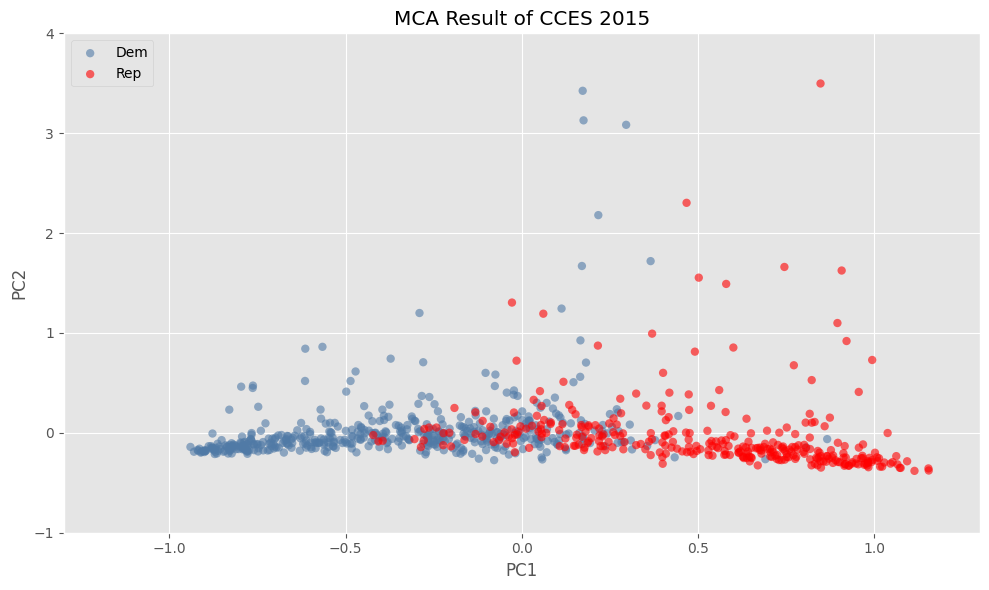

In [ ]:
# Main execution
if __name__ == "__main__":
    processed_data = preprocess_data('data/issuevalue_short.csv')
    # processed_data = preprocess_data('issuesvalues.csv')

    # Perform MCA and plot results
    perform_mca_and_plot(processed_data)